# Checking GPU Availability

In [1]:
import tensorflow as tf

# Check if any GPU is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-11-18 19:21:54.009232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 19:21:54.009260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 19:21:54.009954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 19:21:54.013843: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 19:21:54.476373: W tensorflow/compiler/tf2

Num GPUs Available:  4


2024-11-18 19:21:55.297770: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 19:21:55.299513: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 19:21:55.300798: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use only the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Load Datagens and Base Model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your split dataset directories
train_dir = '/home/exh4748/ProjectTortoise/split_data/train'
val_dir = '/home/exh4748/ProjectTortoise/split_data/val'
test_dir = '/home/exh4748/ProjectTortoise/split_data/test'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation and test sets, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the data loaders (generators)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust to match your model's expected input size, e.g., VGG16 expects 224x224
    batch_size=32,
    class_mode='categorical'  # Set to 'categorical' for multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set to maintain order for evaluation
)

Found 1445 images belonging to 14 classes.
Found 420 images belonging to 14 classes.
Found 427 images belonging to 14 classes.


In [4]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
from tensorflow.keras.models import load_model
# Load the model from the saved path
model = load_model('basemodel.h5')
model.summary()

2024-11-18 19:22:12.059790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 19:22:12.061259: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 19:22:12.062390: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Fine-Tuning Model

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Assume the base model is the first layer
base_model = model.layers[0]  # Adjust the index if needed

# Unfreeze the last 4 layers of the base model
for layer in model.layers[-4:]:  # Unfreeze the last 4 layers of the entire model
    layer.trainable = True

Layer 0: input_1, Trainable: True
Layer 1: block1_conv1, Trainable: False
Layer 2: block1_conv2, Trainable: False
Layer 3: block1_pool, Trainable: False
Layer 4: block2_conv1, Trainable: False
Layer 5: block2_conv2, Trainable: False
Layer 6: block2_pool, Trainable: False
Layer 7: block3_conv1, Trainable: False
Layer 8: block3_conv2, Trainable: False
Layer 9: block3_conv3, Trainable: False
Layer 10: block3_pool, Trainable: False
Layer 11: block4_conv1, Trainable: False
Layer 12: block4_conv2, Trainable: False
Layer 13: block4_conv3, Trainable: False
Layer 14: block4_pool, Trainable: False
Layer 15: block5_conv1, Trainable: False
Layer 16: block5_conv2, Trainable: False
Layer 17: block5_conv3, Trainable: False
Layer 18: block5_pool, Trainable: False
Layer 19: flatten, Trainable: True
Layer 20: dense, Trainable: True
Layer 21: dense_1, Trainable: True


In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
history_fine = model.fit(
    train_generator,
    epochs=50,  # Adjust as needed
    validation_data=val_generator
)

Epoch 1/50


2024-11-18 19:23:13.943188: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-11-18 19:23:14.689119: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4420c33190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-18 19:23:14.689140: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2024-11-18 19:23:14.692832: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731979394.771274  161151 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 [==============================] - 10s 185ms/step - loss: 0.3302 - accuracy: 0.8740 - val_loss: 0.3346 - val_accuracy: 0.8524
Epoch 2/50
46/46 [==============================] - 9s 185ms/step - loss: 0.3131 - accuracy: 0.8872 - val_loss: 0.3063 - val_accuracy: 0.8690
Epoch 3/50
46/46 [==============================] - 9s 189ms/step - loss: 0.3247 - accuracy: 0.8782 - val_loss: 0.2997 - val_accuracy: 0.8690
Epoch 4/50
46/46 [==============================] - 9s 190ms/step - loss: 0.3074 - accuracy: 0.8837 - val_loss: 0.3139 - val_accuracy: 0.8667
Epoch 5/50
46/46 [==============================] - 9s 185ms/step - loss: 0.3114 - accuracy: 0.8803 - val_loss: 0.3139 - val_accuracy: 0.8476
Epoch 6/50
46/46 [==============================] - 9s 187ms/step - loss: 0.3028 - accuracy: 0.8817 - val_loss: 0.3065 - val_accuracy: 0.8595
Epoch 7/50
46/46 [==============================] - 8s 184ms/step - loss: 0.3107 - accuracy: 0.8796 - val_loss: 0.3039 - val_accuracy: 0.8476
Epoch 8/50
46/46

In [8]:
# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test results
print(f"Test Loss after fine-tuning: {test_loss:.4f}")
print(f"Test Accuracy after fine-tuning: {test_accuracy * 100:.2f}%")

14/14 [==============================] - 1s 49ms/step - loss: 0.3082 - accuracy: 0.8548
Test Loss after fine-tuning: 0.3082
Test Accuracy after fine-tuning: 85.48%


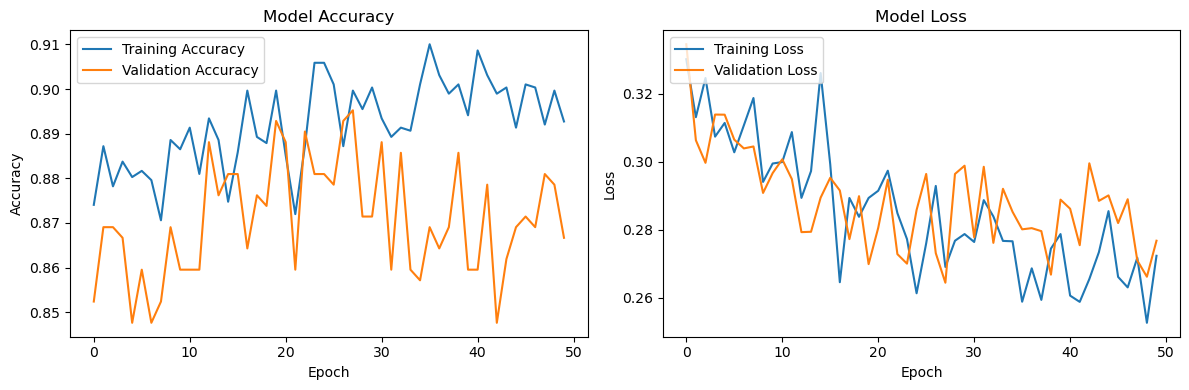

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history_fine)

# Adjustment of Hyperparameters

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras_tuner import HyperModel

def build_model(hp):
    model = Sequential()

    # Add convolutional layers with tunable filters and kernel sizes
    model.add(Conv2D(
        filters=hp.Int('conv_filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(224, 224, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv_filters_2', min_value=64, max_value=256, step=32),
        kernel_size=hp.Choice('conv_kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=64),
        activation='relu'
    ))
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))

    # Compile model with tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [11]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of times to train each combination
    directory='hyperparameter_tuning',
    project_name='image_classification_tuning'
)

In [12]:
tuner.search(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Trial 10 Complete [00h 05m 50s]
val_accuracy: 0.7083333432674408

Best val_accuracy So Far: 0.7964285612106323
Total elapsed time: 00h 59m 07s


In [13]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

Best hyperparameters: {'conv_filters_1': 128, 'conv_kernel_size_1': 5, 'conv_filters_2': 192, 'conv_kernel_size_2': 5, 'dense_units': 320, 'learning_rate': 0.001}


In [15]:
best_model = tuner.hypermodel.build(best_hps)

history_hp = best_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")

Epoch 1/50
46/46 [==============================] - 9s 180ms/step - loss: 5.1666 - accuracy: 0.1163 - val_loss: 2.1034 - val_accuracy: 0.3024
Epoch 2/50
46/46 [==============================] - 9s 185ms/step - loss: 2.1197 - accuracy: 0.2879 - val_loss: 1.8003 - val_accuracy: 0.4095
Epoch 3/50
46/46 [==============================] - 9s 187ms/step - loss: 1.9180 - accuracy: 0.3495 - val_loss: 1.6049 - val_accuracy: 0.4310
Epoch 4/50
46/46 [==============================] - 9s 185ms/step - loss: 1.8877 - accuracy: 0.3585 - val_loss: 1.4829 - val_accuracy: 0.5190
Epoch 5/50
46/46 [==============================] - 9s 186ms/step - loss: 1.6270 - accuracy: 0.4519 - val_loss: 1.3407 - val_accuracy: 0.5262
Epoch 6/50
46/46 [==============================] - 9s 184ms/step - loss: 1.5023 - accuracy: 0.4976 - val_loss: 1.2241 - val_accuracy: 0.5905
Epoch 7/50
46/46 [==============================] - 9s 184ms/step - loss: 1.3579 - accuracy: 0.5329 - val_loss: 1.1135 - val_accuracy: 0.5929
Epoch 

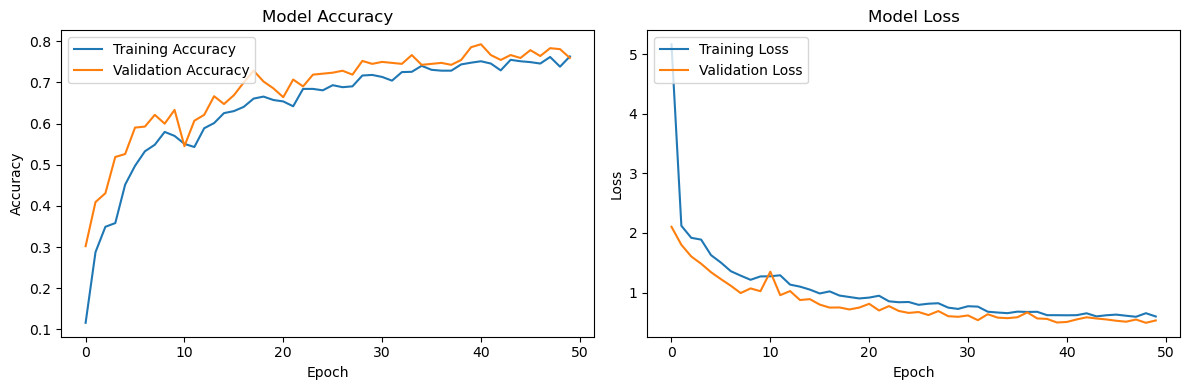

/home/exh4748/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
plot_training_history(history_hp)
# Save the best model
best_model.save('best_model.h5')

# Regularization and Optimizer Changes

In [19]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

# Add L2 regularization to layers
for layer in model.layers:
    if isinstance(layer, Dense) or isinstance(layer, Conv2D):
        layer.kernel_regularizer = l2(0.01)  # Adjust regularization strength

# Rebuild the model to include Dropout (Functional API)
inputs = model.input  # Keep the original input
x = model.layers[0](inputs)  # Apply the first layer explicitly

# Reapply all intermediate layers with added dropout
for layer in model.layers[1:]:
    x = layer(x)
    if isinstance(layer, Dense):  # Add dropout after each Dense layer
        x = Dropout(0.5)(x)

# Rebuild the output layer
outputs = x

# Define the new model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with SGD optimizer and momentum
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [20]:
# Fine-tune the model
history_reg_opt = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)

Epoch 1/50
46/46 [==============================] - 10s 183ms/step - loss: 9.2722 - accuracy: 0.1730 - val_loss: 2.3362 - val_accuracy: 0.1905 - lr: 0.0100
Epoch 2/50
46/46 [==============================] - 9s 188ms/step - loss: 9.1813 - accuracy: 0.1100 - val_loss: 2.5103 - val_accuracy: 0.1238 - lr: 0.0100
Epoch 3/50
46/46 [==============================] - 9s 187ms/step - loss: 8.9083 - accuracy: 0.1087 - val_loss: 2.6008 - val_accuracy: 0.1286 - lr: 0.0100
Epoch 4/50
46/46 [==============================] - 9s 190ms/step - loss: 8.7259 - accuracy: 0.1176 - val_loss: 2.5654 - val_accuracy: 0.1548 - lr: 0.0100
Epoch 5/50
46/46 [==============================] - 9s 187ms/step - loss: 8.5926 - accuracy: 0.1087 - val_loss: 2.3539 - val_accuracy: 0.1667 - lr: 0.0100
Epoch 6/50
46/46 [==============================] - 9s 191ms/step - loss: 9.2301 - accuracy: 0.0893 - val_loss: 2.6273 - val_accuracy: 0.1262 - lr: 0.0100
Epoch 7/50
46/46 [==============================] - 9s 189ms/step - l

14/14 [==============================] - 0s 30ms/step - loss: 2.4431 - accuracy: 0.1897
Test Loss after tuning: 2.4431
Test Accuracy after tuning: 18.97%


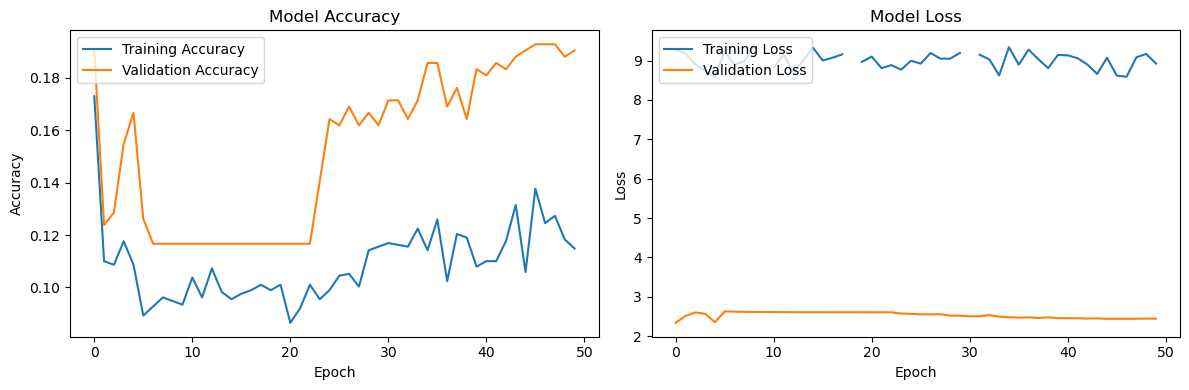

In [21]:
# Evaluate the fine-tuned model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")

# Function to plot training history
plot_training_history(history_reg_opt)
model.save('reg_opt_model.h5')

### Yeah, I'm not sure what happened here..

# Transfer Learning Featuring EfficientNet

In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [23]:
# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensionality
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(14, activation='softmax')(x)  # Final layer for 14 classes

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

16705208/16705208 [==============================] - 0s 0us/step


In [24]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 56, 56, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 56, 56, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 56, 56, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 28, 28, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 28, 28, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 28, 28, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 14, 14, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 14, 14, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 14, 14, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 14, 14, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 14, 14, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 14, 14, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 7, 7, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 7, 7, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 7, 7, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 7, 7, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_average_pooling2d (  (None, 1280)                 0         ['top_activation[0][0]']      
 GlobalAveragePooling2D)                                                                          
                                                                                                  
 dense_6 (

Epoch 1/50
45/45 [==============================] - 12s 193ms/step - loss: 2.6470 - accuracy: 0.0885 - val_loss: 2.6033 - val_accuracy: 0.1154
Epoch 2/50
45/45 [==============================] - 9s 193ms/step - loss: 2.6444 - accuracy: 0.0970 - val_loss: 2.6031 - val_accuracy: 0.1178
Epoch 3/50
45/45 [==============================] - 8s 186ms/step - loss: 2.6239 - accuracy: 0.0998 - val_loss: 2.6087 - val_accuracy: 0.1178
Epoch 4/50
45/45 [==============================] - 8s 188ms/step - loss: 2.6339 - accuracy: 0.0906 - val_loss: 2.6001 - val_accuracy: 0.1154
Epoch 5/50
45/45 [==============================] - 8s 184ms/step - loss: 2.6298 - accuracy: 0.0991 - val_loss: 2.6047 - val_accuracy: 0.1178
Epoch 6/50
45/45 [==============================] - 8s 187ms/step - loss: 2.6299 - accuracy: 0.0984 - val_loss: 2.6015 - val_accuracy: 0.1178
Epoch 7/50
45/45 [==============================] - 8s 184ms/step - loss: 2.6286 - accuracy: 0.0991 - val_loss: 2.6027 - val_accuracy: 0.1130
Epoch

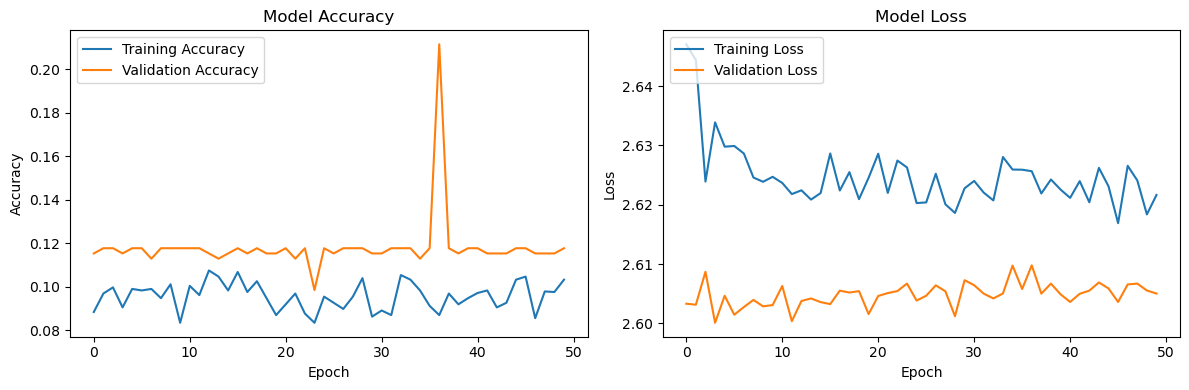

In [25]:
history_effnet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")
plot_training_history(history_effnet)

In [26]:
# Unfreeze the top 20 layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, 56, 56, 24)           2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, 56, 56, 24)           96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, 56, 56, 144)          3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, 28, 28, 40)           5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, 28, 28, 40)           160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, 28, 28, 240)          9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, 14, 14, 80)           19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, 14, 14, 80)           320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, 14, 14, 480)          1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, 14, 14, 80)           0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, 14, 14, 80)           0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, 14, 14, 480)          38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, 14, 14, 112)          0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, 14, 14, 672)          75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, 14, 14, 672)          2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, 14, 14, 672)          0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, 7, 7, 1152)           0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, 7, 7, 192)            0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, 7, 7, 1152)           221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, 7, 7, 1152)           4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, 7, 7, 1152)           0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, 7, 7, 1280)           5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, 7, 7, 1280)           0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_average_pooling2d (  (None, 1280)                 0         ['top_activation[0][0]']      
 GlobalAveragePooling2D)                                                                          
                                                                                                  
 dense_6 (

Epoch 1/50
45/45 [==============================] - 8s 187ms/step - loss: 2.6362 - accuracy: 0.1054 - val_loss: 2.6118 - val_accuracy: 0.1178
Epoch 2/50
45/45 [==============================] - 8s 186ms/step - loss: 2.6227 - accuracy: 0.1090 - val_loss: 2.6108 - val_accuracy: 0.1178
Epoch 3/50
45/45 [==============================] - 9s 188ms/step - loss: 2.6288 - accuracy: 0.1047 - val_loss: 2.6113 - val_accuracy: 0.1178
Epoch 4/50
45/45 [==============================] - 8s 186ms/step - loss: 2.6253 - accuracy: 0.0991 - val_loss: 2.6123 - val_accuracy: 0.1154
Epoch 5/50
45/45 [==============================] - 8s 185ms/step - loss: 2.6288 - accuracy: 0.0934 - val_loss: 2.6119 - val_accuracy: 0.1250
Epoch 6/50
45/45 [==============================] - 9s 189ms/step - loss: 2.6298 - accuracy: 0.1062 - val_loss: 2.6089 - val_accuracy: 0.1226
Epoch 7/50
45/45 [==============================] - 8s 185ms/step - loss: 2.6347 - accuracy: 0.0899 - val_loss: 2.6080 - val_accuracy: 0.1178
Epoch 

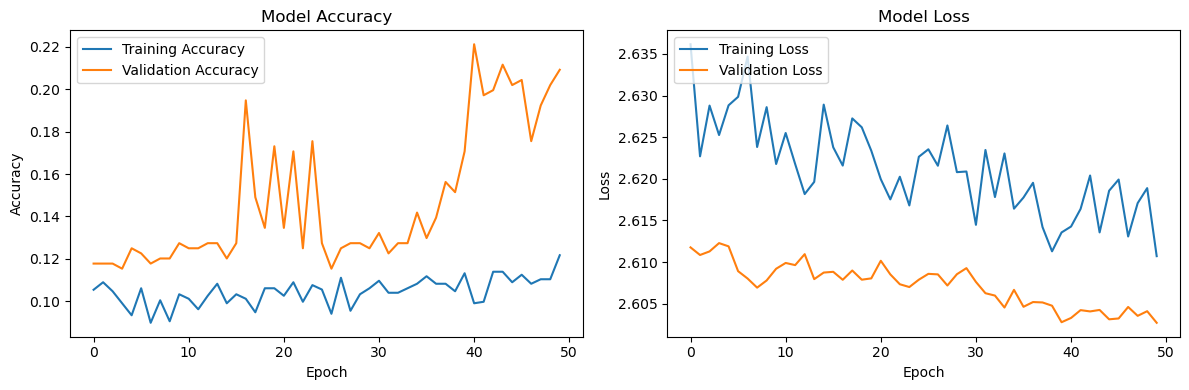

In [28]:
history_effnet_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Adjust based on validation performance
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")
plot_training_history(history_effnet_fine)